k=2, silhouette=0.1453
k=3, silhouette=0.1433
k=4, silhouette=0.1756
k=5, silhouette=0.1587
k=6, silhouette=0.1383
k=7, silhouette=0.1310
k=8, silhouette=0.1532
k=9, silhouette=0.1522
Оптимальное число кластеров: 4
Визуализация кластеров


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


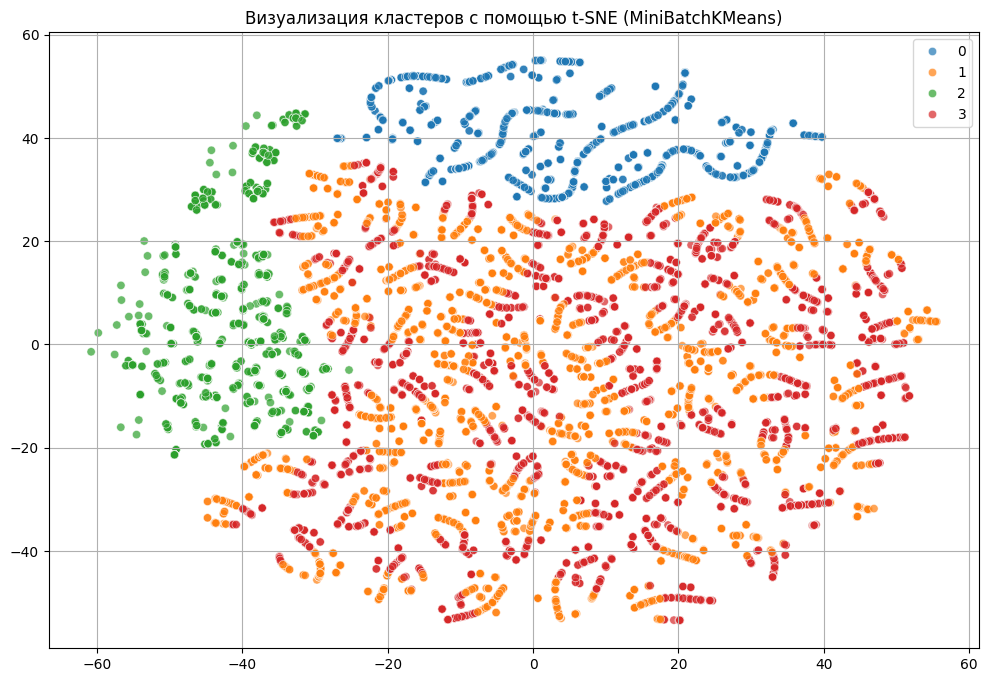

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('preprocessed_final_dataset.csv')

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)

sample_size = 40000
np.random.seed(42)
idx_sample = np.random.choice(len(scaled_features), sample_size, replace=False)
sample_features = scaled_features[idx_sample]

silhouette_scores = []
k_range = range(2, 10)

from sklearn.metrics import silhouette_score
for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=20000, random_state=42)
    clusters = kmeans.fit_predict(sample_features)
    silhouette_avg = silhouette_score(sample_features, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"k={k}, silhouette={silhouette_avg:.4f}")

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Оптимальное число кластеров: {optimal_k}")

final_kmeans = MiniBatchKMeans(n_clusters=optimal_k, batch_size=20000, random_state=42)
df['cluster'] = final_kmeans.fit_predict(scaled_features)

tsne_sample_size = 15000
idx_tsne = np.random.choice(len(scaled_features), tsne_sample_size, replace=False)
features_tsne = scaled_features[idx_tsne]
clusters_tsne = df['cluster'].iloc[idx_tsne].values

print('Визуализация кластеров')
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
tsne_result = tsne.fit_transform(features_tsne)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_result[:,0], y=tsne_result[:,1],
    hue=clusters_tsne,
    palette='tab10',
    legend='full',
    alpha=0.7
)
plt.title('Визуализация кластеров с помощью t-SNE (MiniBatchKMeans)')
plt.grid(True)
plt.show()


In [14]:
df_final = pd.read_csv('final_dataset.csv')
test = pd.concat([df_final, df['cluster']], axis=1)
test.to_csv('final_dataset_with_clusters.csv', index=False)
test

<ipython-input-14-0c089ac07384>:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv('final_dataset.csv')


,datetime,ip,user_id,country,net_type,user_agent,browser,device_complaint,domain,url,event_id,session_id,complaint_date,email,change_date,device_history,cluster
0,2025-05-04 22:34:46.575470,70.233.25.157,366735,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Firefox,Windows,app.ios.marketplace.com,/product/399,3,0228ac0c-8d26-4f62-b06a-9fdb39ab1e09,NaN,NaN,NaN,NaN,2
1,2025-05-04 22:34:46.915708,109.193.27.106,43771,Russia,proxy,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4) Safar...,Firefox,MacOS,app.ios.marketplace.com,/product/182,3,d39dc1a4-e07c-4f05-b8c7-170f85e0b17c,NaN,NaN,NaN,NaN,2
2,2025-05-04 22:34:48.757644,196.46.61.68,377950,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,Windows,app.android.marketplace.com,/cart,4,3445e3df-4b81-43e6-88ec-ec8dd8cd68dc,NaN,NaN,NaN,NaN,2
3,2025-05-04 22:34:49.923815,62.167.134.6,509520,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Firefox,Linux,app.android.marketplace.com,/account,7,5e1719bc-3bb5-4852-ba17-6bfc42496c75,NaN,NaN,NaN,NaN,2
4,2025-05-04 22:34:51.482156,9.45.98.80,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,marketplace.com,/account,7,NaN,NaN,NaN,2025-05-05 06:58:12.093108,iOS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397347,2025-05-05 22:34:35.766473,33.143.236.39,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,app.ios.marketplace.com,/cart,4,NaN,NaN,NaN,2025-05-05 08:02:02.067132,MacOS,3
397348,2025-05-05 22:34:35.766473,33.143.236.39,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,app.ios.marketplace.com,/cart,4,NaN,NaN,NaN,2025-05-05 14:02:38.279513,MacOS,3
397349,2025-05-05 22:34:38.198575,164.6.44.116,628957,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Chrome,Android,app.ios.marketplace.com,/product/253,3,ee261d77-d1b4-4203-ac01-7ebc0adcb01c,NaN,NaN,NaN,NaN,2
397350,2025-05-05 22:34:39.986463,168.91.202.196,531657,Russia,vpn,ParserBot/2.1 (+http://example.com/bot),unknown,unknown,app.android.marketplace.com,/product/497,3,daed4e99-7125-47fa-ae91-f6d100010f4c,NaN,NaN,NaN,NaN,2


In [7]:
test[test['cluster'] == 0]

,datetime,ip,user_id,country,net_type,user_agent,browser,device_complaint,domain,url,event_id,session_id,complaint_date,email,change_date,device_history,cluster
93,2025-05-04 22:34:59.662419,194.193.90.165,0,Russia,ok,ParserBot/2.1 (+http://example.com/bot),unknown,unknown,m.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 06:58:12.093108,iOS,0
94,2025-05-04 22:34:59.662419,194.193.90.165,0,Russia,ok,ParserBot/2.1 (+http://example.com/bot),unknown,unknown,m.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 05:51:29.229240,Windows,0
95,2025-05-04 22:34:59.662419,194.193.90.165,0,Russia,ok,ParserBot/2.1 (+http://example.com/bot),unknown,unknown,m.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 11:47:20.303159,Linux,0
96,2025-05-04 22:34:59.662419,194.193.90.165,0,Russia,ok,ParserBot/2.1 (+http://example.com/bot),unknown,unknown,m.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 09:13:53.077123,iOS,0
97,2025-05-04 22:34:59.662419,194.193.90.165,0,Russia,ok,ParserBot/2.1 (+http://example.com/bot),unknown,unknown,m.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 17:56:41.520685,Windows,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396542,2025-05-05 22:30:40.946231,179.128.104.33,0,Russia,ok,CrawlerBot/4.2 (+http://crawler.example.com),unknown,unknown,app.android.marketplace.com,/home,2,NaN,NaN,NaN,2025-05-05 07:15:15.744700,Android,0
396543,2025-05-05 22:30:40.946231,179.128.104.33,0,Russia,ok,CrawlerBot/4.2 (+http://crawler.example.com),unknown,unknown,app.android.marketplace.com,/home,2,NaN,NaN,NaN,2025-05-05 00:42:55.037500,Windows,0
396544,2025-05-05 22:30:40.946231,179.128.104.33,0,Russia,ok,CrawlerBot/4.2 (+http://crawler.example.com),unknown,unknown,app.android.marketplace.com,/home,2,NaN,NaN,NaN,2025-05-05 13:19:43.106908,iOS,0
396545,2025-05-05 22:30:40.946231,179.128.104.33,0,Russia,ok,CrawlerBot/4.2 (+http://crawler.example.com),unknown,unknown,app.android.marketplace.com,/home,2,NaN,NaN,NaN,2025-05-05 08:02:02.067132,MacOS,0


In [8]:
test[test['cluster'] == 1]

,datetime,ip,user_id,country,net_type,user_agent,browser,device_complaint,domain,url,event_id,session_id,complaint_date,email,change_date,device_history,cluster
4,2025-05-04 22:34:51.482156,9.45.98.80,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,marketplace.com,/account,7,NaN,NaN,NaN,2025-05-05 06:58:12.093108,iOS,1
5,2025-05-04 22:34:51.482156,9.45.98.80,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,marketplace.com,/account,7,NaN,NaN,NaN,2025-05-05 05:51:29.229240,Windows,1
6,2025-05-04 22:34:51.482156,9.45.98.80,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,marketplace.com,/account,7,NaN,NaN,NaN,2025-05-05 11:47:20.303159,Linux,1
7,2025-05-04 22:34:51.482156,9.45.98.80,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,marketplace.com,/account,7,NaN,NaN,NaN,2025-05-05 09:13:53.077123,iOS,1
8,2025-05-04 22:34:51.482156,9.45.98.80,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,marketplace.com,/account,7,NaN,NaN,NaN,2025-05-05 17:56:41.520685,Windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206947,2025-05-05 11:13:28.952481,42.250.132.93,0,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Chrome,Windows,m.marketplace.com,/product/449,3,NaN,NaN,NaN,2025-05-05 07:15:15.744700,Android,1
206948,2025-05-05 11:13:28.952481,42.250.132.93,0,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Chrome,Windows,m.marketplace.com,/product/449,3,NaN,NaN,NaN,2025-05-05 00:42:55.037500,Windows,1
206949,2025-05-05 11:13:28.952481,42.250.132.93,0,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Chrome,Windows,m.marketplace.com,/product/449,3,NaN,NaN,NaN,2025-05-05 13:19:43.106908,iOS,1
206950,2025-05-05 11:13:28.952481,42.250.132.93,0,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Chrome,Windows,m.marketplace.com,/product/449,3,NaN,NaN,NaN,2025-05-05 08:02:02.067132,MacOS,1


In [9]:
test[test['cluster'] == 2]

,datetime,ip,user_id,country,net_type,user_agent,browser,device_complaint,domain,url,event_id,session_id,complaint_date,email,change_date,device_history,cluster
0,2025-05-04 22:34:46.575470,70.233.25.157,366735,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Firefox,Windows,app.ios.marketplace.com,/product/399,3,0228ac0c-8d26-4f62-b06a-9fdb39ab1e09,NaN,NaN,NaN,NaN,2
1,2025-05-04 22:34:46.915708,109.193.27.106,43771,Russia,proxy,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4) Safar...,Firefox,MacOS,app.ios.marketplace.com,/product/182,3,d39dc1a4-e07c-4f05-b8c7-170f85e0b17c,NaN,NaN,NaN,NaN,2
2,2025-05-04 22:34:48.757644,196.46.61.68,377950,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,Windows,app.android.marketplace.com,/cart,4,3445e3df-4b81-43e6-88ec-ec8dd8cd68dc,NaN,NaN,NaN,NaN,2
3,2025-05-04 22:34:49.923815,62.167.134.6,509520,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Firefox,Linux,app.android.marketplace.com,/account,7,5e1719bc-3bb5-4852-ba17-6bfc42496c75,NaN,NaN,NaN,NaN,2
87,2025-05-04 22:34:52.117082,170.234.28.131,343940,China,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Safari,Android,app.android.marketplace.com,/auth/login,1,afff824c-44bb-4203-b6c2-c2368281d6a5,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397264,2025-05-05 22:34:29.010902,190.49.223.8,853835,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,Android,app.android.marketplace.com,/product/321,3,7cf714bb-4d4e-47d0-8e4f-3309bcc340c9,NaN,NaN,NaN,NaN,2
397265,2025-05-05 22:34:32.562994,18.161.212.49,770399,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,Android,m.marketplace.com,/payment,6,a8781ff1-c70d-483f-aad6-0cf685bdcc8f,NaN,NaN,NaN,NaN,2
397349,2025-05-05 22:34:38.198575,164.6.44.116,628957,Russia,ok,Mozilla/5.0 (Android 10; Mobile) Firefox/84.0,Chrome,Android,app.ios.marketplace.com,/product/253,3,ee261d77-d1b4-4203-ac01-7ebc0adcb01c,NaN,NaN,NaN,NaN,2
397350,2025-05-05 22:34:39.986463,168.91.202.196,531657,Russia,vpn,ParserBot/2.1 (+http://example.com/bot),unknown,unknown,app.android.marketplace.com,/product/497,3,daed4e99-7125-47fa-ae91-f6d100010f4c,NaN,NaN,NaN,NaN,2


In [10]:
test[test['cluster'] == 3]

,datetime,ip,user_id,country,net_type,user_agent,browser,device_complaint,domain,url,event_id,session_id,complaint_date,email,change_date,device_history,cluster
199058,2025-05-05 10:44:14.619272,68.87.0.6,0,Russia,ok,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4) Safar...,Firefox,MacOS,app.ios.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 04:49:52.950416,MacOS,3
199061,2025-05-05 10:44:14.619272,68.87.0.6,0,Russia,ok,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4) Safar...,Firefox,MacOS,app.ios.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 05:42:38.447437,MacOS,3
199067,2025-05-05 10:44:14.619272,68.87.0.6,0,Russia,ok,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4) Safar...,Firefox,MacOS,app.ios.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 07:18:13.720610,MacOS,3
199070,2025-05-05 10:44:14.619272,68.87.0.6,0,Russia,ok,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4) Safar...,Firefox,MacOS,app.ios.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 14:03:47.468836,MacOS,3
199084,2025-05-05 10:44:14.619272,68.87.0.6,0,Russia,ok,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4) Safar...,Firefox,MacOS,app.ios.marketplace.com,/auth/login,1,NaN,NaN,NaN,2025-05-05 02:22:59.867352,MacOS,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397344,2025-05-05 22:34:35.766473,33.143.236.39,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,app.ios.marketplace.com,/cart,4,NaN,NaN,NaN,2025-05-05 07:15:15.744700,Android,3
397345,2025-05-05 22:34:35.766473,33.143.236.39,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,app.ios.marketplace.com,/cart,4,NaN,NaN,NaN,2025-05-05 00:42:55.037500,Windows,3
397346,2025-05-05 22:34:35.766473,33.143.236.39,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,app.ios.marketplace.com,/cart,4,NaN,NaN,NaN,2025-05-05 13:19:43.106908,iOS,3
397347,2025-05-05 22:34:35.766473,33.143.236.39,0,Russia,ok,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chro...,Chrome,MacOS,app.ios.marketplace.com,/cart,4,NaN,NaN,NaN,2025-05-05 08:02:02.067132,MacOS,3
